In [12]:
import pandas as pd

train = pd.read_csv("../input/child-mind-institute-problematic-internet-use/train.csv")


In [ ]:
train = pd.read_csv("../input/child-mind-institute-problematic-internet-use/train.csv")
all_nan_peracent = train.isnull().sum()/len(train)
train = train.dropna(subset=["sii"])
train_nan_peracent = train.isnull().sum()/len(train)

In [25]:
diff_nan_peracent = train_nan_peracent - all_nan_peracent
diff_nan_peracent

id                                        0.000000
Basic_Demos-Enroll_Season                 0.000000
Basic_Demos-Age                           0.000000
Basic_Demos-Sex                           0.000000
CGAS-Season                              -0.210792
                                            ...   
SDS-SDS_Total_Raw                        -0.264773
SDS-SDS_Total_T                          -0.264799
PreInt_EduHx-Season                      -0.099847
PreInt_EduHx-computerinternet_hoursday   -0.136443
sii                                      -0.309091
Length: 82, dtype: float64

<Axes: >

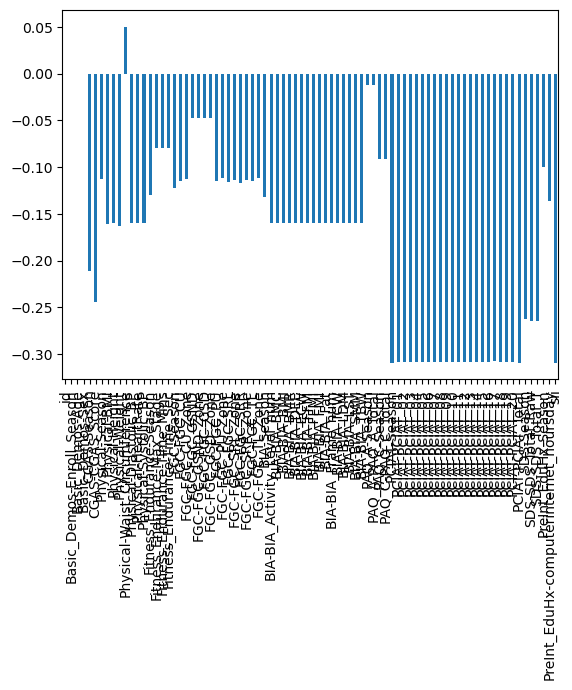

In [33]:
import matplotlib.pyplot as plt
#diff_nan_peracentをプロット
diff_nan_peracent.plot(kind="bar")

<Axes: >

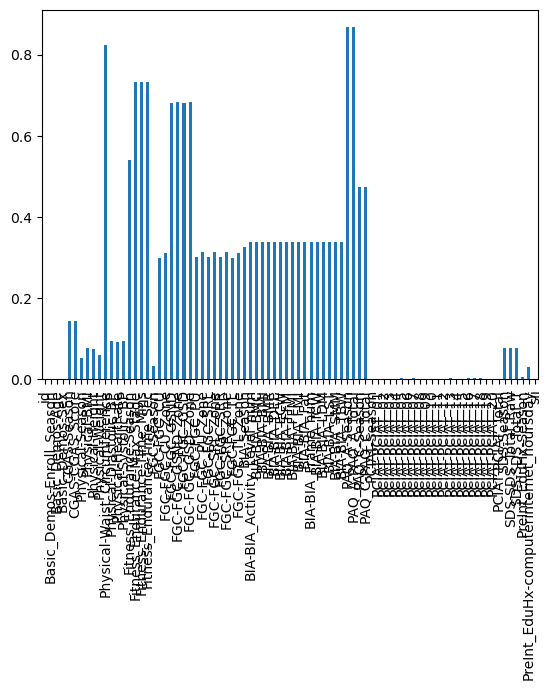

In [ ]:
train_nan_peracent.plot(kind="bar")

In [37]:
#縦の表示制限を解除
pd.set_option('display.max_rows', None)
train_nan_peracent

id                                        0.000000
Basic_Demos-Enroll_Season                 0.000000
Basic_Demos-Age                           0.000000
Basic_Demos-Sex                           0.000000
CGAS-Season                               0.144006
CGAS-CGAS_Score                           0.144006
Physical-Season                           0.051535
Physical-BMI                              0.076389
Physical-Height                           0.075292
Physical-Weight                           0.059942
Physical-Waist_Circumference              0.823465
Physical-Diastolic_BP                     0.094298
Physical-HeartRate                        0.091374
Physical-Systolic_BP                      0.094298
Fitness_Endurance-Season                  0.539474
Fitness_Endurance-Max_Stage               0.732822
Fitness_Endurance-Time_Mins               0.733918
Fitness_Endurance-Time_Sec                0.733918
FGC-Season                                0.032529
FGC-FGC_CU                     

<Axes: >

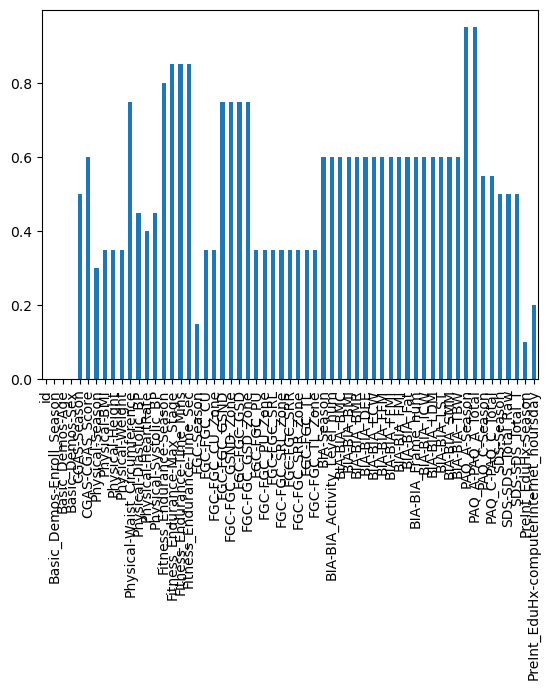

In [40]:
test = pd.read_csv("../input/child-mind-institute-problematic-internet-use/test.csv")
test_nan_peracent = test.isnull().sum()/len(test)
test_nan_peracent.plot(kind="bar")

In [43]:
all_nan_peracent

id                                        0.000000
Basic_Demos-Enroll_Season                 0.000000
Basic_Demos-Age                           0.000000
Basic_Demos-Sex                           0.000000
CGAS-Season                               0.354798
CGAS-CGAS_Score                           0.388636
Physical-Season                           0.164141
Physical-BMI                              0.236869
Physical-Height                           0.235606
Physical-Weight                           0.223232
Physical-Waist_Circumference              0.773232
Physical-Diastolic_BP                     0.254040
Physical-HeartRate                        0.250758
Physical-Systolic_BP                      0.254040
Fitness_Endurance-Season                  0.669697
Fitness_Endurance-Max_Stage               0.812374
Fitness_Endurance-Time_Mins               0.813131
Fitness_Endurance-Time_Sec                0.813131
FGC-Season                                0.155051
FGC-FGC_CU                     

In [49]:
ts_train = pd.read_parquet("../input/child-mind-institute-problematic-internet-use/series_train.parquet")

In [51]:
#縦の表示制限
pd.set_option('display.max_rows', 10)
ts_train["id"].unique()
id_list=ts_train["id"].unique()

In [54]:
train = pd.read_csv("../input/child-mind-institute-problematic-internet-use/train.csv")
train["issiinull"] = train["sii"].isnull()

In [62]:
# train["istsnull"]の初期値を1に設定
train["istsnull"] = True

# id_listに含まれるidの行だけ"istsnull"を0に設定
train.loc[train["id"].isin(id_list), "istsnull"] = False


In [71]:
train["issiinull"].value_counts()

issiinull
False    2736
True     1224
Name: count, dtype: int64

In [72]:
2736-1224

1512

In [74]:
train["tmp"] = train["issiinull"] | train["istsnull"]
train[train["tmp"]==False]


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,issiinull,istsnull,tmp
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,44.0,Summer,31.0,45.0,Winter,0.0,1.0,False,False,False
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,34.0,Summer,40.0,56.0,Spring,0.0,1.0,False,False,False
20,00f332d1,Winter,14,0,Spring,68.0,Spring,17.168636,66.50,108.0,...,47.0,Spring,30.0,43.0,Winter,2.0,1.0,False,False,False
22,01085eb3,Fall,12,0,Winter,58.0,Fall,34.187282,60.50,178.0,...,30.0,Fall,53.0,73.0,Fall,0.0,0.0,False,False,False
25,012cadd8,Spring,9,0,Winter,60.0,Fall,17.089151,53.20,68.8,...,9.0,Summer,27.0,40.0,Spring,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,fe9c71d8,Winter,9,0,Spring,80.0,Winter,15.891137,56.75,72.8,...,29.0,Winter,33.0,47.0,Winter,0.0,0.0,False,False,False
3947,fecc07d6,Fall,7,0,Spring,85.0,Winter,15.986589,49.00,54.6,...,14.0,Winter,34.0,49.0,Fall,0.0,0.0,False,False,False
3951,ff18b749,Spring,7,0,NaN,NaN,Summer,14.768842,47.50,47.4,...,0.0,Summer,62.0,85.0,Spring,0.0,0.0,False,False,False
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.00,109.8,...,31.0,Winter,56.0,77.0,Fall,0.0,1.0,False,False,False


ts 欠損　　iss欠損　　1224
ts 欠損　　iss非欠損  1740
ts 非欠損　iss 欠損   1512
欠損なし              996 
全体
時系列的には iss測定開始　→　ts測定開始
tsデータはcmi1でも使ってるはず
テストデータは未公開3800　←　最新のデータを持ってきてるはず
テストデータはsii欠損なし　どこからでてきた？

cmi1
